# ADS Homework 2. part 1

## 1: Classification of Hand-Written Digits

Sklearn provides a dataset of handwritten digits as one of the examples. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


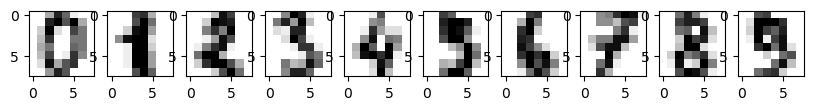

In [4]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features

In [5]:
#set target variable (y) as index
data.set_index(y,inplace=True)
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
# apply standardization to the pixels data (x1,x2...x64)
#(even though the features are grayscale pixels this way it might be useful to account for heterogenous density in different areas)
data_pixel=data.iloc[:,:]
data_Xstd=(data_pixel[:]-data_pixel.mean())/data_pixel.std()
data_Xstd=data_Xstd.fillna(0)
data_Xstd.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,-1.567310,0.0,-0.334923,-0.043069,0.273995,-0.664293,-0.843894,-0.40961,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,0.086695,0.208235,-0.366669,-1.146328,-0.505529,-0.195953
1,-1.218306,0.0,-0.334923,-1.094632,0.038637,0.268676,-0.137981,-0.40961,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-0.248940,0.849396,0.548408,-0.505529,-0.195953
2,-0.869303,0.0,-0.334923,-1.094632,-1.844229,0.735161,1.097367,-0.40961,-0.124988,-0.059061,...,0.259158,-0.209727,-0.02359,-0.298998,-1.089080,-2.077640,-0.163992,1.565250,1.694665,-0.195953
3,-0.520300,0.0,-0.334923,0.377556,0.744712,0.268676,-0.843894,-0.40961,-0.124988,-0.059061,...,1.072264,-0.209727,-0.02359,-0.298998,0.282657,0.208235,0.241363,0.378934,-0.505529,-0.195953
4,-0.171297,0.0,-0.334923,-1.094632,-2.550304,-0.197808,-1.020373,-0.40961,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-2.306227,0.849396,-0.468434,-0.505529,-0.195953


In [7]:
data_st=data
data_st.iloc[:,1:]=data_Xstd.iloc[:,1:]
data_st.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,-0.334923,-0.043069,0.273995,-0.664293,-0.843894,-0.40961,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,0.086695,0.208235,-0.366669,-1.146328,-0.505529,-0.195953
1,1.0,0.0,-0.334923,-1.094632,0.038637,0.268676,-0.137981,-0.40961,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-0.248940,0.849396,0.548408,-0.505529,-0.195953
2,2.0,0.0,-0.334923,-1.094632,-1.844229,0.735161,1.097367,-0.40961,-0.124988,-0.059061,...,0.259158,-0.209727,-0.02359,-0.298998,-1.089080,-2.077640,-0.163992,1.565250,1.694665,-0.195953
3,3.0,0.0,-0.334923,0.377556,0.744712,0.268676,-0.843894,-0.40961,-0.124988,-0.059061,...,1.072264,-0.209727,-0.02359,-0.298998,0.282657,0.208235,0.241363,0.378934,-0.505529,-0.195953
4,4.0,0.0,-0.334923,-1.094632,-2.550304,-0.197808,-1.020373,-0.40961,-0.124988,-0.059061,...,-0.757225,-0.209727,-0.02359,-0.298998,-1.089080,-2.306227,0.849396,-0.468434,-0.505529,-0.195953


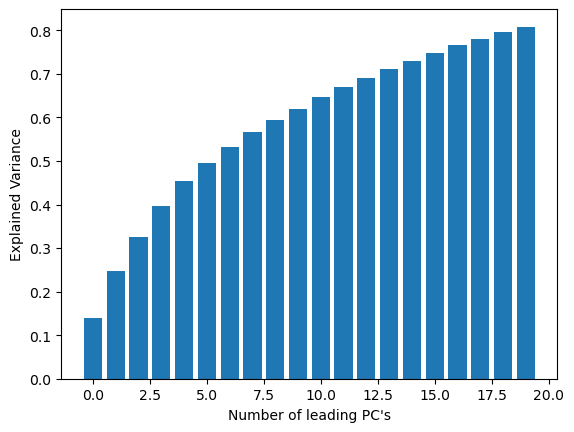

In [8]:
#perform PC decomposition over data
#Plot explained variance per number of leading PC's 
pca=PCA(data_st.shape[1])
data_st_p=pca.fit_transform(data_st)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance per number of leading PC's
n=20
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of leading PC's")
plt.ylabel("Explained Variance")
plt.show()

##### Describe in a few words what you can infer from the above plot:

The first one component explains about 15% of the features;

The first two components explain about 26% of the features;

About 31% of the components explain about the 80% of the fetures.

### Task 2: Now use three leading PCs to visualize the digits (a 3d scatterplot in PC space with different colors representing different digits)

In [9]:
#reapply PCA with three components so we can visualize in 3 dimensions
pca_top3=PCA(n_components=3)
data_st_p_top3=pca_top3.fit_transform(data_st)
data_top3=pd.DataFrame(data_st_p_top3,columns=['PC1', 'PC2', 'PC3'])
data_top3.head(3)

,PC1,PC2,PC3
0,-4.365645,1.945448,-1.370066
1,-3.386698,0.611873,3.493399
2,-2.946310,1.326144,1.891918


In [10]:
# contact y and the top three components
data_top3_reset = data_top3.reset_index(drop=True)
data_st_reset = data_st.iloc[:,0].reset_index(drop=True)
data_top3 = pd.concat([data_st_reset,data_top3_reset], axis=1)
data_top3

,y,PC1,PC2,PC3
0,0.0,-4.365645,1.945448,-1.370066
1,1.0,-3.386698,0.611873,3.493399
2,2.0,-2.946310,1.326144,1.891918
3,3.0,-1.459075,-3.008067,-0.911697
4,4.0,-1.052562,4.540294,-0.248306
...,...,...,...,...
1792,9.0,4.814120,0.066472,-2.817217
1793,0.0,-4.896067,2.461323,-1.162404
1794,8.0,2.898910,1.004949,0.252611
1795,9.0,4.328991,1.045124,-2.628542


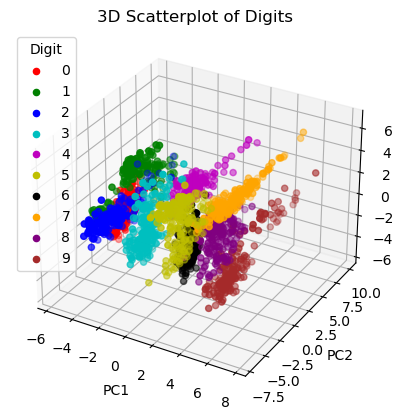

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color_map = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm', 5: 'y', 6: 'k', 7: 'orange', 8: 'purple', 9: 'brown'}


for digit, color in color_map.items():
    data_top3_digit = data_top3[data_top3['y'] == digit]
    ax.scatter(data_top3_digit['PC1'], data_top3_digit['PC2'], data_top3_digit['PC3'], c=color, marker='o', label=str(digit))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatterplot of Digits')

ax.legend(title='Digit')

plt.show()

### Task 3: Find examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of  first two PCs (provide 3 examples each on separate plots)

In [12]:
# Dimensionality down to two dimensions
pca_top2=PCA(n_components=2)
data_st_p_top2=pca_top2.fit_transform(data_st)
data_top2=pd.DataFrame(data_st_p_top2,columns=['PC1', 'PC2'])
data_top2.head(3)

,PC1,PC2
0,-4.365643,1.945445
1,-3.386694,0.611905
2,-2.946308,1.326238


In [13]:
# contact y and the top three components
data_top2_reset = data_top2.reset_index(drop=True)
data_st2_reset = data_st.iloc[:,0].reset_index(drop=True)
data_top2 = pd.concat([data_st_reset,data_top2_reset], axis=1)
data_top2.head(3)

,y,PC1,PC2
0,0.0,-4.365643,1.945445
1,1.0,-3.386694,0.611905
2,2.0,-2.946308,1.326238


<Figure size 640x480 with 0 Axes>

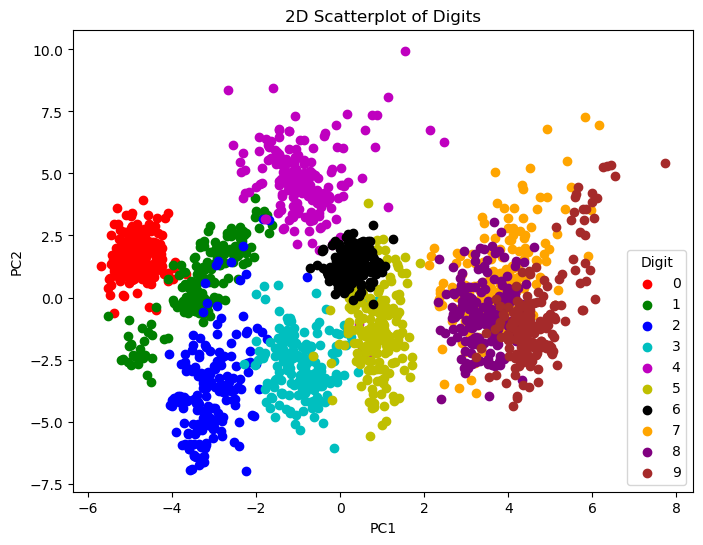

In [14]:
fig = plt.figure()
plt.figure(figsize=(8, 6))

for digit in range(10):
    digit_2d=data_top2[data_top2['y']==digit]
    plt.scatter(digit_2d['PC1'], digit_2d['PC2'],c=color_map[digit], marker='o',label=str(digit))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Scatterplot of Digits')
plt.legend(title='Digit')

plt.show() 

#### a) can distinguish (the colors that don't overlap with each other)
1 and 7

0 and 9

2 and 5

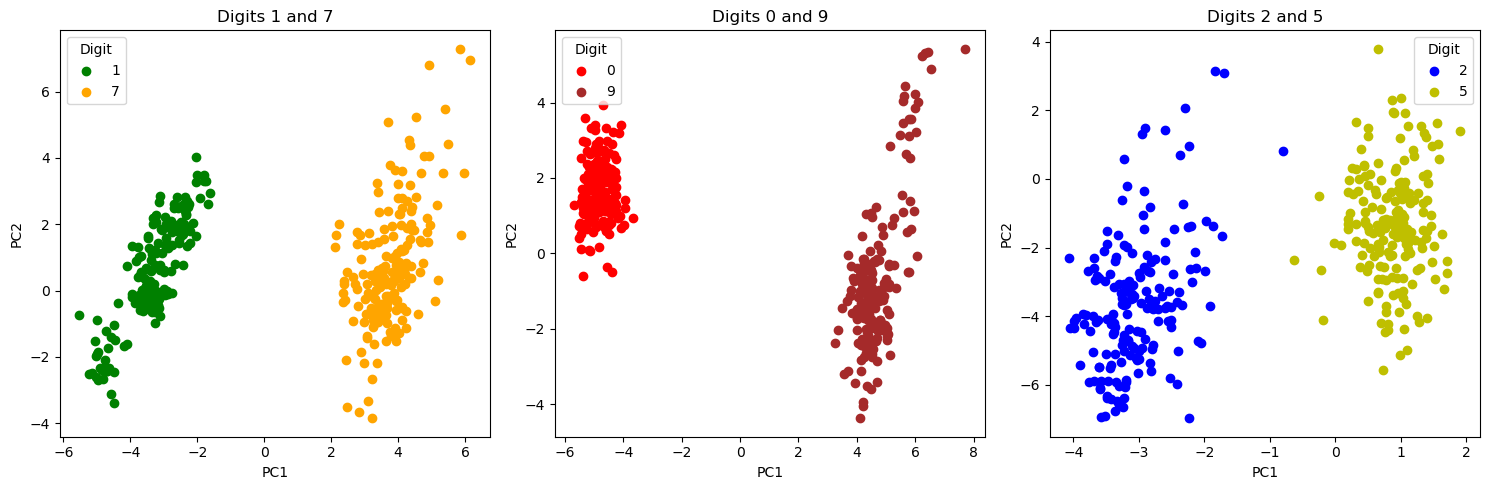

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


for digit in (1,7):
    digit_2d=data_top2[data_top2['y']==digit]
    axes[0].scatter(digit_2d['PC1'], digit_2d['PC2'],c=color_map[digit], marker='o',label=str(digit))

axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Digits 1 and 7')
axes[0].legend(title='Digit')


for digit in (0,9):
    digit_2d=data_top2[data_top2['y']==digit]
    axes[1].scatter(digit_2d['PC1'], digit_2d['PC2'],c=color_map[digit], marker='o',label=str(digit))

axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Digits 0 and 9')
axes[1].legend(title='Digit')


for digit in (2,5):
    digit_2d=data_top2[data_top2['y']==digit]
    axes[2].scatter(digit_2d['PC1'], digit_2d['PC2'],c=color_map[digit], marker='o',label=str(digit))

axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].set_title('Digits 2 and 5')
axes[2].legend(title='Digit')

plt.tight_layout()

plt.show()


#### b) can't distinguish (the colors that overlap with each other)
5 and 6

7 and 8

7 and 9

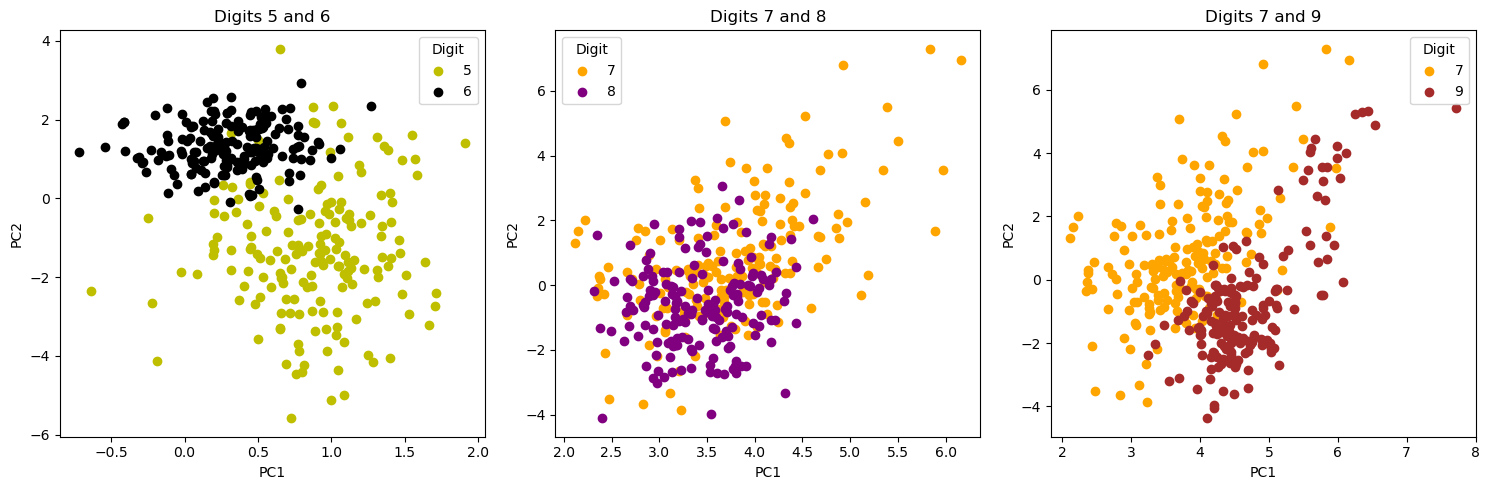

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


for digit in (5,6):
    digit_2d=data_top2[data_top2['y']==digit]
    axes[0].scatter(digit_2d['PC1'], digit_2d['PC2'],c=color_map[digit], marker='o',label=str(digit))

axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Digits 5 and 6')
axes[0].legend(title='Digit')


for digit in (7,8):
    digit_2d=data_top2[data_top2['y']==digit]
    axes[1].scatter(digit_2d['PC1'], digit_2d['PC2'],c=color_map[digit], marker='o',label=str(digit))

axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Digits 7 and 8')
axes[1].legend(title='Digit')


for digit in (7,9):
    digit_2d=data_top2[data_top2['y']==digit]
    axes[2].scatter(digit_2d['PC1'], digit_2d['PC2'],c=color_map[digit], marker='o',label=str(digit))

axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].set_title('Digits 7 and 9')
axes[2].legend(title='Digit')

plt.tight_layout()

plt.show()